C:\Users\haruna\anaconda3\envs\keras35\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\haruna\anaconda3\envs\keras35\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\haruna\anaconda3\envs\keras35\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Epoch 1/100
1171/1171 [==============================] - 41s 35ms/step - loss: 86.2072
Epoch 2/100
1171/1171 [==============================] - 41s 35ms/step - loss: 80.2598
Epoch 3/100
1171/1171 [==============================] - 42s 36ms/step - loss: 74.4878
Epoch 4/100
1171/1171 [==============================] - 44s 37ms/step - loss: 75.9257
Epoch 5/100
1171/1171 [==============================] - 43s 36ms/step - loss: 60.7013
Epoch 6/100
1171/1171 [==============================] - 47s 40ms/step - loss: 51.4297
Epoch 7/100
1171/1171 [==============================] - 49s 42ms/step - loss: 59.4241
Epoch 8/100
1171/1171 [==============================] - 46s 39ms/step - loss: 52.7307
Epoch 9/100
1171/1171 [==============================] - 47s 40ms/step - loss: 59.7714
Epoch 10/100
1171/1171 [==============================] - 47s 40ms/step - loss: 52.8880
Epoch 11/100
1171/1171 [==============================] - 47s 40ms/step - loss: 51.0854
Epoch 12/100
1171/1171 [=================

1171/1171 [==============================] - 55s 47ms/step - loss: 29.7411
Epoch 94/100
1171/1171 [==============================] - 56s 48ms/step - loss: 31.0033
Epoch 95/100
1171/1171 [==============================] - 59s 50ms/step - loss: 29.1145
Epoch 96/100
1171/1171 [==============================] - 55s 47ms/step - loss: 27.4222
Epoch 97/100
1171/1171 [==============================] - 54s 46ms/step - loss: 28.8428
Epoch 98/100
1171/1171 [==============================] - 55s 47ms/step - loss: 30.8968
Epoch 99/100
1171/1171 [==============================] - 58s 49ms/step - loss: 27.5948
Epoch 100/100
1171/1171 [==============================] - 58s 50ms/step - loss: 30.9429


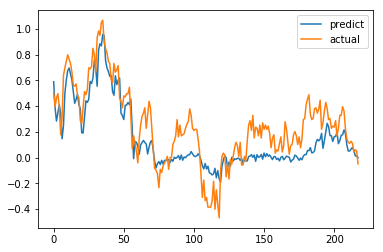

In [14]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM

class Prediction :

    def __init__(self):
        self.length_of_sequences = 100
        self.in_out_neurons = 1
        self.hidden_neurons = 300


    def load_data(self, data, n_prev=100):
        X, Y = [], []
        for i in range(len(data) - n_prev):
            X.append(data.iloc[i:(i+n_prev)].as_matrix())
            Y.append(data.iloc[i+n_prev].as_matrix())
            retX = numpy.array(X)
            retY = numpy.array(Y)
        return retX, retY


    def create_model(self) :
        model = Sequential()
        model.add(LSTM(self.hidden_neurons, \
                  batch_input_shape=(None, self.length_of_sequences, self.in_out_neurons), \
                  return_sequences=False))
        model.add(Dense(self.in_out_neurons))
        model.add(Activation("linear"))
        model.compile(loss="mape", optimizer="adam")
        return model


    def train(self, X_train, y_train) :
        model = self.create_model()
        # 学習
        model.fit(X_train, y_train, batch_size=10, nb_epoch=100)
        return model


if __name__ == "__main__":

    prediction = Prediction()

  # データ準備
    data = None
    data=pd.read_csv('old2587TimeChart.csv', header=0, encoding='cp932')
    
    #data = pandas.read_csv('7201TimeChart'+ str(year) +  '.csv', header=0, encoding='cp932')

    data.columns = ['date', 'open', 'high', 'low', 'close','5average','25average','75average','vwap','dekidaka','dekidaka5','dekidaka25']
    data['date'] = pandas.to_datetime(data['date'], format='%Y-%m-%d')
    # 終値のデータを標準化
    data['close'] = preprocessing.scale(data['close'])
    data = data.sort_values(by='date')
    data = data.reset_index(drop=True)
    data = data.loc[:, ['date', 'close']]

    # 2割をテストデータへ
    split_pos = int(len(data) * 0.8)
    x_train, y_train = prediction.load_data(data[['close']].iloc[0:split_pos], prediction.length_of_sequences)
    x_test,  y_test  = prediction.load_data(data[['close']].iloc[split_pos:], prediction.length_of_sequences)

    model = prediction.train(x_train, y_train)

    predicted = model.predict(x_test)
    result = pandas.DataFrame(predicted)
    result.columns = ['predict']
    result['actual'] = y_test
    result.plot()
    plt.show()


In [8]:
import numpy
import pandas
import matplotlib.pyplot as plt

from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM


data = pandas.read_csv('7201TimeChart2007.csv', header=0, encoding='cp932')